<a href="https://colab.research.google.com/github/ryanhassell/IDS/blob/main/HW4/problem2_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ryan Hassell

#Importing and Cleaning Data

In [1]:
# import data
library(readr)
nutrition <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv", show_col_types = FALSE)

In [2]:
print(nutrition)

# A tibble: 961 × 4
   `food item`                         weight_in_grams saturated_fat cholesterol
   <chr>                                         <dbl>         <dbl>       <dbl>
 1 GELATIN; DRY                  1 EN…             7             0             0
 2 SEAWEED; SPIRULINA; DRIED     1 OZ             28.4           0.8           0
 3 YEAST; BAKERS; DRY; ACTIVE    1 PKG             7             0             0
 4 PARMESAN CHEESE; GRATED       1 OZ             28.4           5.4          22
 5 PARMESAN CHEESE; GRATED       1 CUP           100            19.1          79
 6 PARMESAN CHEESE; GRATED       1 TB…             5             1             4
 7 YEAST; BREWERS; DRY           1 TB…             8             0             0
 8 LAMB;CHOPS;ARM;BRAISED;LEAN   1.7 …            48             2.9          59
 9 TUNA; CANND; DRND;WATR; WHITE 3 OZ             85             0.3          48
10 NONFAT DRY MILK; INSTANTIZED  1 CUP            68             0.3          12
# ℹ 951 

In [3]:
# summary of nutrition table
summary(nutrition)

  food item         weight_in_grams  saturated_fat      cholesterol     
 Length:961         Min.   :   0.4   Min.   :  0.000   Min.   :   0.00  
 Class :character   1st Qu.:  32.0   1st Qu.:  0.000   1st Qu.:   0.00  
 Mode  :character   Median : 113.0   Median :  0.400   Median :   0.00  
                    Mean   : 149.4   Mean   :  3.988   Mean   :  32.55  
                    3rd Qu.: 218.0   3rd Qu.:  3.300   3rd Qu.:  20.00  
                    Max.   :1542.0   Max.   :119.900   Max.   :2053.00  

While some of these data values may be zero, this is actually legitimate data. Nutrition facts can contain zeroes.

# Sorting the Data

In [4]:
# sort
nutrition_sorted <- nutrition[order(nutrition$saturated_fat, decreasing = TRUE),]

print(head(nutrition_sorted, 5))

# A tibble: 5 × 4
  `food item`                          weight_in_grams saturated_fat cholesterol
  <chr>                                          <dbl>         <dbl>       <dbl>
1 CHEESECAKE                    1 CAKE            1110         120.         2053
2 ICE CREAM; VANLLA; RICH 16% FT1/2 G…            1188         118.          703
3 YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE            1108          92           609
4 CREME PIE                     1 PIE              910          90.1          46
5 LARD                          1 CUP              205          80.4         195


According to this list, cheesecake is the worst. However, this list of items is incorrect because the size of each item is inconsistent. We need to compare stats by each gram.

In order to do this, we will create a new column saturated_fat_by_gram.

#Saturated Fat by Gram

In [5]:
# create sfat_gram column
nutrition$sfat_gram <- (nutrition$saturated_fat/nutrition$weight_in_grams)

# created a sorted table
sorted_by_sfat <- nutrition[order(nutrition$sfat_gram, decreasing = TRUE),]

# print said sorted table
print(head(sorted_by_sfat, 5))

# A tibble: 5 × 5
  `food item`                weight_in_grams saturated_fat cholesterol sfat_gram
  <chr>                                <dbl>         <dbl>       <dbl>     <dbl>
1 BUTTER; SALTED           …              14           7.1          31     0.507
2 BUTTER; UNSALTED         …              14           7.1          31     0.507
3 BUTTER; SALTED           …             113          57.1         247     0.505
4 BUTTER; UNSALTED         …             113          57.1         247     0.505
5 BUTTER; SALTED           …               5           2.5          11     0.5  


Now, after sorting, it seems that butter is actually the fattiest food in our dataset.

#Standardization

In [19]:
# create scaled_sfat_gram column
nutrition$scaled_sfat_gram <- scale(nutrition$sfat_gram)

# 3sig
threesig <- (nutrition$sfat_gram < -3 |
                     nutrition$scaled_sfat_gram > 3 )
outliers <- nutrition[threesig , ]

# sort
outliers <- outliers[order(-outliers$scaled_sfat_gram), ]

cat ("scaled_sfat_gram has",sum(threesig),"outliers\n")

print(outliers)

scaled_sfat_gram has 15 outliers
# A tibble: 15 × 8
   `food item`               weight_in_grams saturated_fat cholesterol sfat_gram
   <chr>                               <dbl>         <dbl>       <dbl>     <dbl>
 1 BUTTER; SALTED          …            14             7.1          31     0.507
 2 BUTTER; UNSALTED        …            14             7.1          31     0.507
 3 BUTTER; SALTED          …           113            57.1         247     0.505
 4 BUTTER; UNSALTED        …           113            57.1         247     0.505
 5 BUTTER; SALTED          …             5             2.5          11     0.5  
 6 BUTTER; UNSALTED        …             5             2.5          11     0.5  
 7 LARD                    …            13             5.1          12     0.392
 8 LARD                    …           205            80.4         195     0.392
 9 IMITATION CREAMERS; POWD…             2             0.7           0     0.35 
10 CHOCOLATE; BITTER OT BAK…            28.4           9 

From our standardization procedure, we have deduced that there are fifteen outliers present in the scaled saturated fat column.

#High end and Low end outliers

In [7]:
# make 3sig rules for high and low cases
sigHigh <- (nutrition$scaled_sfat_gram > 3)
sigLow <- (nutrition$scaled_sfat_gram < -3)

# get outliers for high and low cases
high <- nutrition$scaled_sfat_gram[which(sigHigh)]
low <- nutrition$scaled_sfat_gram[which(sigLow)]

cat("num high outliers:", length(high))
cat("\nnum low outliers:", length(low))

num high outliers: 15
num low outliers: 0

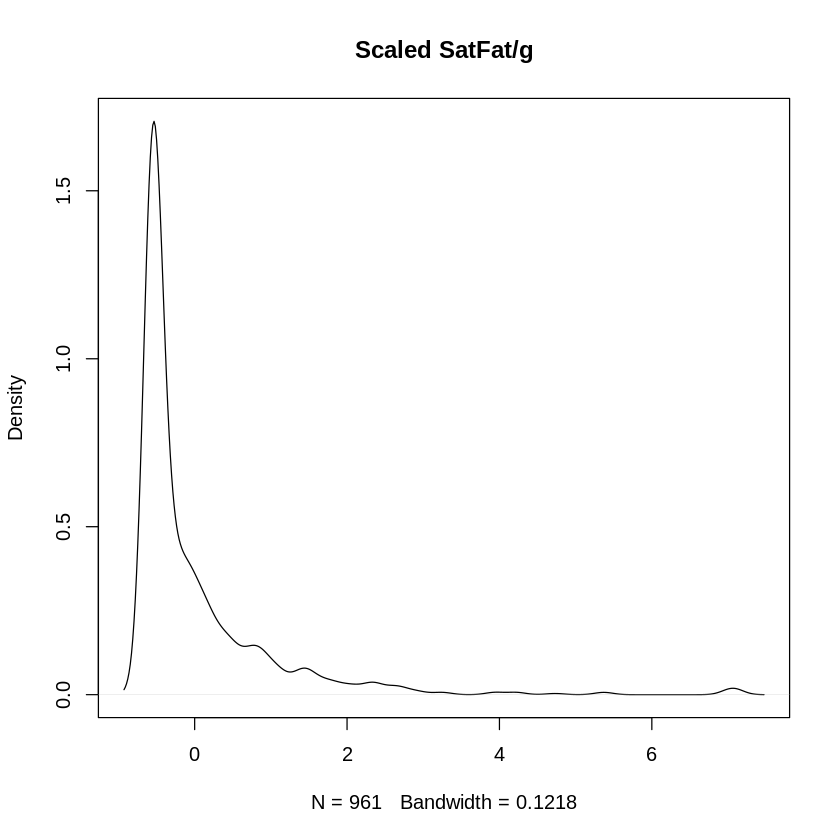

In [8]:
# create a density graph of the scaled variable
plot(density(nutrition$scaled_sfat_gram, na.rm = TRUE), main="Scaled SatFat/g")

#Check for missing variables

In [9]:
# check if anything has no value in nutrition
colSums(is.na(nutrition))

food item weight_in_grams   saturated_fat     cholesterol       sfat_gram 
              0               0               0               0               0 
                
              0

No missing variables.

#Checking other variables for outliers

In [10]:
# create column scaled_chol
nutrition$scaled_chol <- scale(x = nutrition$cholesterol)

# create high and low sig
highsig <- (nutrition$scaled_chol > 3)
lowsig <- (nutrition$scaled_chol < -3)

# print out the # of high and low outliers in scaled_chol
cat ("column 'scaled_chol' has", sum(highsig), "high outliers")
cat (" and has", sum(lowsig), "low outliers")

# print the summary of scaled_chol
summary(nutrition$scaled_chol)

column 'scaled_chol' has 17 high outliers and has 0 low outliers

       V1         
 Min.   :-0.2714  
 1st Qu.:-0.2714  
 Median :-0.2714  
 Mean   : 0.0000  
 3rd Qu.:-0.1046  
 Max.   :16.8426  

In [11]:
# create column scaled_weight
nutrition$scaled_weight <- scale(x = nutrition$weight_in_grams)

# create high and low sig
highsigweight <- (nutrition$scaled_weight > 3)
lowsigweight <- (nutrition$scaled_weight < -3)

# print out the # of high and low outliers in scaled_chol
cat ("column 'scaled_weight' has", sum(highsigweight), "high outliers")
cat (" and has", sum(lowsigweight), "low outliers")

# print the summary of scaled_weight
summary(nutrition$scaled_weight)

column 'scaled_weight' has 22 high outliers and has 0 low outliers

       V1         
 Min.   :-0.8471  
 1st Qu.:-0.6674  
 Median :-0.2070  
 Mean   : 0.0000  
 3rd Qu.: 0.3899  
 Max.   : 7.9165  

#Summary

Through the investigation, I have discovered that, when sorted correctly (by satfat/g), the highest content of saturated fats is in butters. In terms of outliers, I have concluded that:

*   Column 'cholesterol' has 17 outliers
*   Column 'weight' has 22 outliers
*   Column 'saturated_fat_per_gram' has 15 outliers
*   None of these columns have any low end outliers